In [52]:
from IPython.display import IFrame
import folium
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from branca.colormap import LinearColormap, StepColormap, linear
import numpy as np

In [53]:
DemocraticQualityData = pd.read_excel('../Data/HappinessData.xls', sheet_name = 'Table2.1', usecols="A,B,M")
DemocraticQualityData.head()

,country,year,Democratic Quality
0,Afghanistan,2008,-1.929690
1,Afghanistan,2009,-2.044093
2,Afghanistan,2010,-1.991810
3,Afghanistan,2011,-1.919018
4,Afghanistan,2012,-1.842996


In [54]:
# Get the more recent Democratic Quality score --> should we take the mean ?
DemocraticQualityData = DemocraticQualityData.sort_values('year', ascending=False)\
    .groupby("country").first()

In [55]:
DemocraticQualityData = DemocraticQualityData.drop('year', axis=1)
DemocraticQualityData.head()

,Democratic Quality
country,
Afghanistan,-1.917693
Albania,0.208456
Algeria,-1.008262
Angola,-0.739363
Argentina,0.381370


In [56]:
#FIPS_codes = pd.read_csv('../Data/fips-country-codes.csv', usecols = ['Name', 'FIPS 10-4'])
#print(FIPS_codes)

In [57]:
FIPS_codes = pd.read_csv('../Data/fipscountries.csv', usecols = ['country', 'fips'])\
    .rename(index=str, columns={'fips':'FIPS'})
FIPS_codes.head()

,FIPS,country
0,AN,Andorra
1,AE,United Arab Emirates
2,AF,Afghanistan
3,AC,Antigua and Barbuda
4,AV,Anguilla


In [58]:
DemocraticQuality_byFIPS = DemocraticQualityData.merge(FIPS_codes, left_on='country', right_on='country')
DemocraticQuality_byFIPS.head()

,country,Democratic Quality,FIPS
0,Afghanistan,-1.917693,AF
1,Albania,0.208456,AL
2,Algeria,-1.008262,AG
3,Angola,-0.739363,AO
4,Argentina,0.381370,AR


In [59]:
DemocraticQuality_byFIPS['Democratic Quality'].describe()

count    155.000000
mean      -0.167136
std        0.877713
min       -2.448228
25%       -0.738321
50%       -0.270198
75%        0.524382
max        1.467140
Name: Democratic Quality, dtype: float64

In [60]:
# Split DemocraticQuality index into bins in order to group countries with similar index
DemocraticQuality_byFIPS['Democratic Quality binned']=pd.cut(DemocraticQuality_byFIPS['Democratic Quality'],\
                                                             bins = [-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5])
DemocraticQuality_byFIPS.head()

,country,Democratic Quality,FIPS,Democratic Quality binned
0,Afghanistan,-1.917693,AF,"(-2.0, -1.5]"
1,Albania,0.208456,AL,"(0.0, 0.5]"
2,Algeria,-1.008262,AG,"(-1.5, -1.0]"
3,Angola,-0.739363,AO,"(-1.0, -0.5]"
4,Argentina,0.381370,AR,"(0.0, 0.5]"


In [61]:
list_by_bin = DemocraticQuality_byFIPS.groupby('Democratic Quality binned')['FIPS'].apply(list)

binned_DemocraticQuality = pd.DataFrame(list_by_bin)
binned_DemocraticQuality = binned_DemocraticQuality.reset_index()
binned_DemocraticQuality = binned_DemocraticQuality.rename(index=str, columns={'Democratic Quality binned':'Democratic_Quality_binned'})

binned_DemocraticQuality.head()

,Democratic_Quality_binned,FIPS
0,"(-2.5, -2.0]","[SO, OD, SU, SY, YM]"
1,"(-2.0, -1.5]","[AF, ET, IZ, LY, PK]"
2,"(-1.5, -1.0]","[AG, AJ, BA, CT, CD, CH, EG, IR, LE, NI, RS, S..."
3,"(-1.0, -0.5]","[AO, AM, BG, BO, BY, CM, CU, DJ, GB, GV, HA, I..."
4,"(-0.5, 0.0]","[BL, BK, UV, CB, CO, CN, EC, GG, GT, GY, HO, I..."


In [62]:
binned_DemocraticQuality.to_csv('binned_DemocraticQuality_FIPS', header=False, index=False)

In [63]:
averageTone_FIPS = pd.read_csv('../Data/avgToneBySourceLocation_table.csv')
averageTone_FIPS.head()

,FIPS,AverageTone
0,IT,-1.226632
1,WA,-2.156439
2,CM,-2.944971
3,ML,-1.462604
4,MG,-0.242109


In [64]:
DemocraticQuality_AvgTone_byFIPS = DemocraticQuality_byFIPS.merge(averageTone_FIPS, left_on='FIPS', right_on='FIPS')
DemocraticQuality_AvgTone_byFIPS.head()

,country,Democratic Quality,FIPS,Democratic Quality binned,AverageTone
0,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",-3.374755
1,Albania,0.208456,AL,"(0.0, 0.5]",-1.843297
2,Algeria,-1.008262,AG,"(-1.5, -1.0]",-2.045113
3,Angola,-0.739363,AO,"(-1.0, -0.5]",-1.026558
4,Argentina,0.381370,AR,"(0.0, 0.5]",-1.964747


In [65]:
DemocraticQuality_AvgTone_mean=DemocraticQuality_AvgTone_byFIPS.groupby('Democratic Quality binned')['AverageTone']\
    .apply(np.mean)
DemocraticQuality_AvgTone_mean.head()

Democratic Quality binned
(-2.5, -2.0]   -2.631084
(-2.0, -1.5]   -2.574403
(-1.5, -1.0]   -1.635941
(-1.0, -0.5]   -1.562412
(-0.5, 0.0]    -1.735919
Name: AverageTone, dtype: float64

Text(0, 0.5, 'Average Tone')

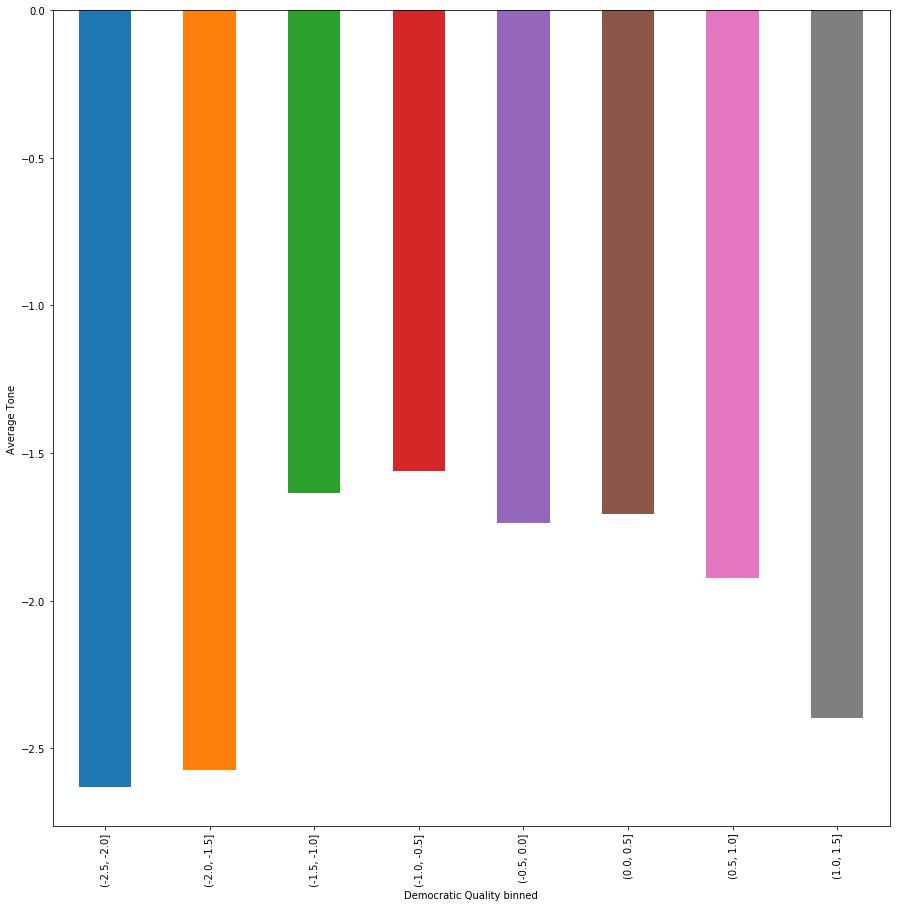

In [66]:
DemocraticQuality_AvgTone_mean.plot.bar()
plt.ylabel('Average Tone')

In [67]:
print('The Pearson correlation between Democratic Quality and Average Tone is : ')
print(DemocraticQuality_AvgTone_byFIPS['Democratic Quality'].corr(DemocraticQuality_AvgTone_byFIPS['AverageTone']))

The Pearson correlation between Democratic Quality and Average Tone is : 
-0.07340862656961676


In [68]:
# Observe for several EventRootCodes, the average tone in each country
avgTone_FIPS_EventRootCode = pd.read_csv('../Data/avgTone_FIPS_EventRootCode.csv')\
    .rename(index=str, columns={'f0_':'AvgTone'})
avgTone_FIPS_EventRootCode.head()

,FIPS,EventRootCode,AvgTone
0,TU,5,0.641469
1,JO,5,0.100875
2,SC,5,2.567115
3,GP,5,-0.572004
4,PC,5,-1.619279


In [69]:
# Try to find a link with the democratic index in the country
avgTone_EventRootCode_Demo = DemocraticQuality_byFIPS\
    .merge(avgTone_FIPS_EventRootCode, left_on='FIPS', right_on='FIPS')
avgTone_EventRootCode_Demo.head()

,country,Democratic Quality,FIPS,Democratic Quality binned,EventRootCode,AvgTone
0,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",5,-0.896783
1,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",6,-2.208447
2,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",14,-5.137769
3,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",15,-3.055255
4,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",19,-6.547427


/anaconda3/envs/adaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


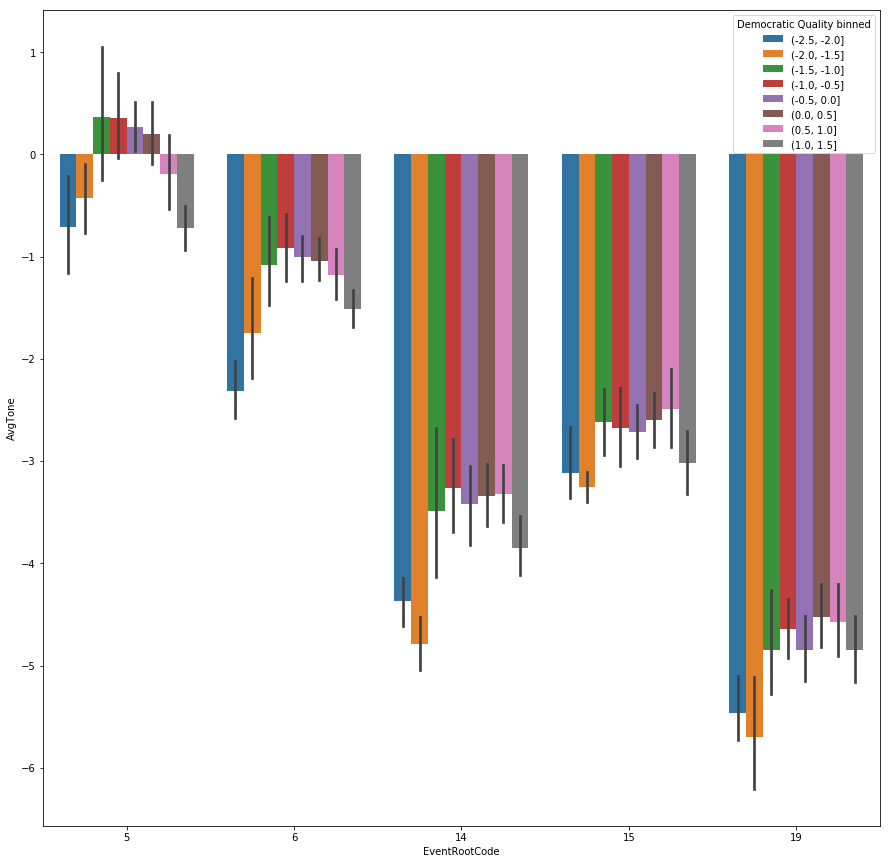

In [70]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
sns.barplot(x="EventRootCode", y="AvgTone", hue="Democratic Quality binned", data=avgTone_EventRootCode_Demo)

In [71]:
avgTone_EventRootCode_Demo_binned = avgTone_EventRootCode_Demo.groupby(['Democratic Quality binned', 'EventRootCode'])['AvgTone'].apply(np.mean)

avgTone_EventRootCode_Demo_binned = pd.DataFrame(avgTone_EventRootCode_Demo_binned).unstack()
avgTone_EventRootCode_Demo_binned.head()

AvgTone                                        
EventRootCode                    5         6         14        15        19
Democratic Quality binned                                                  
(-2.5, -2.0]              -0.710548 -2.314746 -4.368456 -3.113141 -5.463931
(-2.0, -1.5]              -0.426933 -1.744307 -4.785505 -3.253414 -5.701234
(-1.5, -1.0]               0.362697 -1.084794 -3.488653 -2.620177 -4.845885
(-1.0, -0.5]               0.359623 -0.911364 -3.266903 -2.678450 -4.639899
(-0.5, 0.0]                0.267157 -1.005996 -3.415420 -2.711075 -4.842796

In [72]:
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 20
#plt.rcParams["figure.figsize"] = fig_size

#avgTone_EventRootCode_Demo_binned.unstack(level=0).plot(kind='bar', subplots=True)
#fig = plt.gcf()
#fig.savefig("democratic_event_avgTone.png")

In [73]:
#GovernmentConfidenceData = pd.read_excel('../Data/HappinessData.xls', sheet_name = 'Table2.1', usecols="A,B,L")\
 #   .sort_values('year', ascending=False)\
  #  .groupby("country").first()\
   # .drop('year', axis=1)\
    #.dropna()
#GovernmentConfidenceData.head()

In [74]:
# Observe the link with Confidence in the national government
GovernmentConfidenceData = pd.read_excel('../Data/HappinessData.xls', sheet_name = 'Table2.1', usecols="A,L")\
    .groupby('country')\
    .apply(np.mean)\
    .dropna()
GovernmentConfidenceData.head()

,Confidence in national government
country,
Afghanistan,0.400442
Albania,0.409726
Angola,0.397389
Argentina,0.400587
Armenia,0.302084


In [75]:
GovernmentConfidenceData_byFIPS = GovernmentConfidenceData.merge(FIPS_codes, left_on='country', right_on='country')
GovernmentConfidenceData_byFIPS.head()

,country,Confidence in national government,FIPS
0,Afghanistan,0.400442,AF
1,Albania,0.409726,AL
2,Angola,0.397389,AO
3,Argentina,0.400587,AR
4,Armenia,0.302084,AM


In [76]:
GovernmentConfidenceData_byFIPS['Confidence in national government'].describe()

count    146.000000
mean       0.499504
std        0.181166
min        0.164084
25%        0.364060
50%        0.469831
75%        0.602204
max        0.961462
Name: Confidence in national government, dtype: float64

In [77]:
GovernmentConfidence_AvgTone_byFIPS = GovernmentConfidenceData_byFIPS.merge(averageTone_FIPS, left_on='FIPS', right_on='FIPS')
GovernmentConfidence_AvgTone_byFIPS.head()

,country,Confidence in national government,FIPS,AverageTone
0,Afghanistan,0.400442,AF,-3.374755
1,Albania,0.409726,AL,-1.843297
2,Angola,0.397389,AO,-1.026558
3,Argentina,0.400587,AR,-1.964747
4,Armenia,0.302084,AM,-1.528395


In [78]:
print('The Pearson correlation between Government confidence and Average Tone is : ')
print(GovernmentConfidence_AvgTone_byFIPS['Confidence in national government']\
      .corr(GovernmentConfidence_AvgTone_byFIPS['AverageTone']))

The Pearson correlation between Government confidence and Average Tone is : 
0.0985741722552275


In [79]:
# Observe the link with the corruption
CorruptionData = pd.read_excel('../Data/HappinessData.xls', sheet_name = 'Table2.1', usecols="A,I")\
    .groupby('country')\
    .apply(np.mean)\
    .dropna()
CorruptionData.head()

,Perceptions of corruption
country,
Afghanistan,0.826794
Albania,0.859691
Algeria,0.661478
Angola,0.867018
Argentina,0.844038


In [80]:
CorruptionData_byFIPS = CorruptionData.merge(FIPS_codes, left_on='country', right_on='country')
CorruptionData_byFIPS.head()

,country,Perceptions of corruption,FIPS
0,Afghanistan,0.826794,AF
1,Albania,0.859691,AL
2,Algeria,0.661478,AG
3,Angola,0.867018,AO
4,Argentina,0.844038,AR


In [81]:
CorruptionData_byFIPS['Perceptions of corruption'].describe()

count    152.000000
mean       0.748378
std        0.174332
min        0.183798
25%        0.701091
50%        0.798155
75%        0.858603
max        0.956521
Name: Perceptions of corruption, dtype: float64

In [82]:
Corruption_AvgTone_byFIPS = CorruptionData_byFIPS.merge(averageTone_FIPS, left_on='FIPS', right_on='FIPS')
Corruption_AvgTone_byFIPS.head()

,country,Perceptions of corruption,FIPS,AverageTone
0,Afghanistan,0.826794,AF,-3.374755
1,Albania,0.859691,AL,-1.843297
2,Algeria,0.661478,AG,-2.045113
3,Angola,0.867018,AO,-1.026558
4,Argentina,0.844038,AR,-1.964747


In [83]:
print('The Pearson correlation between Corruption perception and Average Tone is : ')
print(Corruption_AvgTone_byFIPS['Perceptions of corruption']\
      .corr(Corruption_AvgTone_byFIPS['AverageTone']))

The Pearson correlation between Corruption perception and Average Tone is : 
0.08604790179045836


In [269]:
# Country instability analysis
#GoldsteinScaleData = pd.read_csv('../Data/AvgGoldsteinScale_FIPS_table.csv')
GoldsteinScaleData = pd.read_csv('../Data/AvgGoldsteinScale_Country.csv')
GoldsteinScaleData.head()

,Country,GoldsteinScale
0,EK,1.378627
1,ES,0.069854
2,SM,1.606001
3,NE,2.223742
4,FG,1.543815


In [270]:
print(GoldsteinScaleData['GoldsteinScale'].describe())

count    263.000000
mean       0.946860
std        0.725349
min       -1.787273
25%        0.661686
50%        1.026576
75%        1.319273
max        2.958824
Name: GoldsteinScale, dtype: float64


In [271]:
GoldsteinScaleData = FIPS_codes.merge(GoldsteinScaleData, left_on='FIPS', right_on='Country')
GoldsteinScaleData.head()

,FIPS,country,Country,GoldsteinScale
0,AN,Andorra,AN,1.526419
1,AE,United Arab Emirates,AE,1.630164
2,AF,Afghanistan,AF,-0.939730
3,AC,Antigua and Barbuda,AC,1.492641
4,AV,Anguilla,AV,1.960489


In [264]:
def normalize_series(series):
    abs_series = series.abs() #Absolute values of the whole column
    max_value = abs_series.max() # Max of the absolute values
    
    return series/max_value

In [272]:
GoldsteinScaleData.loc[GoldsteinScaleData['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData.loc[GoldsteinScaleData['country']=='Serbia', 'country'] = 'Republic of Serbia'

#GoldsteinScaleData['GoldsteinScale'] = normalize_series(GoldsteinScaleData['GoldsteinScale'])

GoldsteinScale_dict = GoldsteinScaleData.set_index('country')['GoldsteinScale'].to_dict()

In [273]:
world_borders = json.load(open('../Data/world_borders.topojson.json'))

In [274]:
def color_function(feature, data, color_fun):
    value = data.get(feature['properties']['name'])
    if value is None:
        return '#8c8c8c' # MISSING -> gray
    else:
        return color_fun(value)

In [276]:
world_map = folium.Map(tiles='Mapbox bright', zoom_start=5.5)

# Defining a style function to color the map and the borders
style_func=lambda feature: {'fillColor': '#990033','color' : 'black','weight' : 2 }

# Using a GeoJsonTooltip to display country name when mouse is over them
tool=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], sticky=True, \
                           style="font-family: Arial; color: black;", \
                           opacity=0.8, \
                           direction='top' \
                          )

# Load border information on the map
folium.TopoJson(world_borders,\
                object_path='objects.countries1',\
                style_function=style_func,\
                tooltip=tool, \
                overlay=False \
               ) \
      .add_to(world_map)

color_scale_Goldstein = LinearColormap(['red','blue'], \
                                     vmin = min(GoldsteinScale_dict.values()), \
                                     vmax = max(GoldsteinScale_dict.values()) \
                                    )

#FIRST MAP
folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Average Goldstein Scale',
    ).add_to(world_map)

color_scale_Goldstein.caption = 'Average Goldstein Scale per country (full date range)'
world_map.add_child(color_scale_Goldstein)
folium.LayerControl().add_to(world_map)
world_map  

world_map.save('GoldsteinMap_full.html')

IFrame(src='GoldsteinMap_full.html', width=900, height=700)

In [398]:
# Year 2014
#GoldsteinScaleData_2014 = pd.read_csv('../Data/2014_GoldsteinScale_FIPS_table.csv')
#GoldsteinScaleData_2014 = FIPS_codes.merge(GoldsteinScaleData_2014, left_on='FIPS', right_on='FIPS')
#GoldsteinScaleData_2014.loc[GoldsteinScaleData_2014['country']=='United States', 'country'] = 'United States of America'
#GoldsteinScaleData_2014.loc[GoldsteinScaleData_2014['country']=='Serbia', 'country'] = 'Republic of Serbia'

#GoldsteinScaleData_2014['GoldsteinScale'] = normalize_series(GoldsteinScaleData_2014['GoldsteinScale'])
#GoldsteinScale_dict_2014 = GoldsteinScaleData_2014.set_index('country')['GoldsteinScale'].to_dict()


# Year 2015
#GoldsteinScaleData_2015 = pd.read_csv('../Data/2015_GoldsteinScale_FIPS_table.csv')
GoldsteinScaleData_2015 = pd.read_csv('../Data/2015_GoldsteinScale_Country.csv')
#GoldsteinScaleData_2015 = FIPS_codes.merge(GoldsteinScaleData_2015, left_on='FIPS', right_on='FIPS')
GoldsteinScaleData_2015 = FIPS_codes.merge(GoldsteinScaleData_2015, left_on='FIPS', right_on='Country')
GoldsteinScaleData_2015.loc[GoldsteinScaleData_2015['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData_2015.loc[GoldsteinScaleData_2015['country']=='Serbia', 'country'] = 'Republic of Serbia'

print('2015 : \n {}'.format(GoldsteinScaleData_2015['GoldsteinScale'] .describe()))
#GoldsteinScaleData_2015['GoldsteinScale'] = normalize_series(GoldsteinScaleData_2015['GoldsteinScale'])
GoldsteinScale_dict_2015 = GoldsteinScaleData_2015.set_index('country')['GoldsteinScale'].to_dict()

#Year 2016
#GoldsteinScaleData_2016 = pd.read_csv('../Data/2016_GoldsteinScale_FIPS_table.csv')
GoldsteinScaleData_2016 = pd.read_csv('../Data/2016_GoldsteinScale_Country.csv')
#GoldsteinScaleData_2016 = FIPS_codes.merge(GoldsteinScaleData_2016, left_on='FIPS', right_on='FIPS')
GoldsteinScaleData_2016 = FIPS_codes.merge(GoldsteinScaleData_2016, left_on='FIPS', right_on='Country')
GoldsteinScaleData_2016.loc[GoldsteinScaleData_2016['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData_2016.loc[GoldsteinScaleData_2016['country']=='Serbia', 'country'] = 'Republic of Serbia'

print('2016 : \n {}'.format(GoldsteinScaleData_2016['GoldsteinScale'] .describe()))
#GoldsteinScaleData_2016['GoldsteinScale'] = normalize_series(GoldsteinScaleData_2016['GoldsteinScale'])
GoldsteinScale_dict_2016 = GoldsteinScaleData_2016.set_index('country')['GoldsteinScale'].to_dict()

# Year 2017
#GoldsteinScaleData_2017 = pd.read_csv('../Data/2017_GoldsteinScale_FIPS_table.csv')
GoldsteinScaleData_2017 = pd.read_csv('../Data/2017_GoldsteinScale_Country.csv')
#GoldsteinScaleData_2017 = FIPS_codes.merge(GoldsteinScaleData_2017, left_on='FIPS', right_on='FIPS')
GoldsteinScaleData_2017 = FIPS_codes.merge(GoldsteinScaleData_2017, left_on='FIPS', right_on='Country')
GoldsteinScaleData_2017.loc[GoldsteinScaleData_2017['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData_2017.loc[GoldsteinScaleData_2017['country']=='Serbia', 'country'] = 'Republic of Serbia'

print('2017 : \n {}'.format(GoldsteinScaleData_2017['GoldsteinScale'] .describe()))
#GoldsteinScaleData_2017['GoldsteinScale'] = normalize_series(GoldsteinScaleData_2017['GoldsteinScale'])
GoldsteinScale_dict_2017 = GoldsteinScaleData_2017.set_index('country')['GoldsteinScale'].to_dict()

# Year 2018
#GoldsteinScaleData_2018 = pd.read_csv('../Data/2018_GoldsteinScale_FIPS_table.csv')
GoldsteinScaleData_2018 = pd.read_csv('../Data/2018_GoldsteinScale_Country.csv')
#GoldsteinScaleData_2018 = FIPS_codes.merge(GoldsteinScaleData_2018, left_on='FIPS', right_on='FIPS')
GoldsteinScaleData_2018 = FIPS_codes.merge(GoldsteinScaleData_2018, left_on='FIPS', right_on='Country')
GoldsteinScaleData_2018.loc[GoldsteinScaleData_2018['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData_2018.loc[GoldsteinScaleData_2018['country']=='Serbia', 'country'] = 'Republic of Serbia'

print('2018 : \n {}'.format(GoldsteinScaleData_2018['GoldsteinScale'] .describe()))
#GoldsteinScaleData_2018['GoldsteinScale'] = normalize_series(GoldsteinScaleData_2018['GoldsteinScale'])
GoldsteinScale_dict_2018 = GoldsteinScaleData_2018.set_index('country')['GoldsteinScale'].to_dict()

2015 : 
 count    238.000000
mean       0.932034
std        0.689381
min       -2.420757
25%        0.630100
50%        1.065208
75%        1.369720
max        2.356981
Name: GoldsteinScale, dtype: float64
2016 : 
 count    238.000000
mean       0.913457
std        0.655247
min       -1.662997
25%        0.614663
50%        1.002059
75%        1.314582
max        2.925000
Name: GoldsteinScale, dtype: float64
2017 : 
 count    238.000000
mean       0.948297
std        0.651095
min       -1.378371
25%        0.652092
50%        1.018673
75%        1.307475
max        3.547059
Name: GoldsteinScale, dtype: float64
2018 : 
 count    238.000000
mean       1.024257
std        0.632409
min       -1.173283
25%        0.690639
50%        1.064790
75%        1.407400
max        2.611429
Name: GoldsteinScale, dtype: float64


In [282]:
evolution_Map = folium.Map(tiles='Mapbox bright', zoom_start=5.5)


tool=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], sticky=True, \
                           style="font-family: Arial; color: black;", \
                           opacity=0.8, \
                           direction='top')


color_scale_Goldstein = LinearColormap(['red','blue'], \
                                     vmin = -2.5, \
                                     vmax = 3.6)


"""
folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict_2014, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Average Goldstein Scale 2014'
    ).add_to(evolution_Map)
"""

folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict_2015, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Average Goldstein Scale 2015'
    ).add_to(evolution_Map)



folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict_2016, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Average Goldstein Scale 2016',
    show=False
    ).add_to(evolution_Map)




folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict_2017, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Average Goldstein Scale 2017',
    show = False
    ).add_to(evolution_Map)



folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict_2018, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Average Goldstein Scale 2018',
    show = False
    ).add_to(evolution_Map)



color_scale_Goldstein.caption = 'Average Goldstein Scale per country'

evolution_Map.add_child(color_scale_Goldstein)

layerControl = folium.LayerControl()
evolution_Map.add_child(layerControl)

evolution_Map

evolution_Map.save('Evolution.html')

IFrame(src='Evolution.html', width=900, height=700)

In [42]:
folium.__version__ == '0.6.0'

True

In [102]:
avgTone_internalSources_Data = pd.read_csv('../Data/avgTone_internalSources.csv')
avgTone_internalSources_Data = avgTone_internalSources_Data.merge(FIPS_codes, left_on='EventLocation', right_on='FIPS')\
    .drop('FIPS', axis=1)
avgTone_internalSources_Data.head()

,EventLocation,AvgTone_Intern,country
0,ZA,-0.822406,Zambia
1,LO,-1.806090,Slovakia
2,AL,-1.590928,Albania
3,CW,0.579648,Cook Islands
4,RO,-1.307122,Romania


In [110]:
avgTone_internalSources_Data.loc[avgTone_internalSources_Data['country']=='United States', 'country'] = 'United States of America'
avgTone_internalSources_Data.loc[avgTone_internalSources_Data['country']=='Serbia', 'country'] = 'Republic of Serbia'
print(avgTone_internalSources_Data['AvgTone_Intern'].describe())
avgTone_internalSources_dict = avgTone_internalSources_Data.set_index('country')['AvgTone_Intern'].to_dict()

count    212.000000
mean      -0.937858
std        1.345638
min       -3.845790
25%       -1.795483
50%       -1.091014
75%       -0.432748
max        3.351737
Name: AvgTone_Intern, dtype: float64


In [116]:
avgTone_externalSources_Data = pd.read_csv('../Data/avgTone_externalSources.csv')
avgTone_externalSources_Data = avgTone_externalSources_Data.merge(FIPS_codes, left_on='EventLocation', right_on='FIPS')\
    .drop('FIPS', axis=1)
avgTone_externalSources_Data.head()

,EventLocation,AvgTone_Extern,country
0,NT,-0.675984,Netherlands Antilles
1,AU,-2.316602,Austria
2,MA,-1.708456,Madagascar
3,ZA,-1.990604,Zambia
4,VM,-1.913008,Vietnam


In [117]:
avgTone_externalSources_Data.loc[avgTone_externalSources_Data['country']=='United States', 'country'] = 'United States of America'
avgTone_externalSources_Data.loc[avgTone_externalSources_Data['country']=='Serbia', 'country'] = 'Republic of Serbia'
print(avgTone_externalSources_Data['AvgTone_Extern'].describe())
avgTone_externalSources_dict = avgTone_externalSources_Data.set_index('country')['AvgTone_Extern'].to_dict()


count    235.000000
mean      -2.312214
std        1.143217
min       -5.595630
25%       -2.981656
50%       -2.220734
75%       -1.543780
max        0.730550
Name: AvgTone_Extern, dtype: float64


In [114]:
world_map = folium.Map(tiles='Mapbox bright', zoom_start=5.5)

# Defining a style function to color the map and the borders
style_func=lambda feature: {'fillColor': '#990033','color' : 'black','weight' : 2 }

# Using a GeoJsonTooltip to display country name when mouse is over them
tool=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], sticky=True, \
                           style="font-family: Arial; color: black;", \
                           opacity=0.8, \
                           direction='top' \
                          )

# Load border information on the map
folium.TopoJson(world_borders,\
                object_path='objects.countries1',\
                style_function=style_func,\
                tooltip=tool, \
                overlay=False \
               ) \
      .add_to(world_map)

color_scale = LinearColormap(['red','blue'], \
                #vmin = min(avgTone_internalSources_dict.values()), \
                #vmax = max(avgTone_internalSources_dict.values()) \
                              vmin=-5.7, vmax= 3.5)

#FIRST MAP
folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, avgTone_internalSources_dict, color_scale),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Average tone in internal medias',
    ).add_to(world_map)

color_scale.caption = 'Average tone in internal medias'
world_map.add_child(color_scale)
folium.LayerControl().add_to(world_map)
world_map  

world_map.save('AvgTone_InternalSources.html')

IFrame(src='AvgTone_InternalSources.html', width=900, height=700)

In [115]:
world_map = folium.Map(tiles='Mapbox bright', zoom_start=5.5)

# Defining a style function to color the map and the borders
style_func=lambda feature: {'fillColor': '#990033','color' : 'black','weight' : 2 }

# Using a GeoJsonTooltip to display country name when mouse is over them
tool=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], sticky=True, \
                           style="font-family: Arial; color: black;", \
                           opacity=0.8, \
                           direction='top' \
                          )

# Load border information on the map
folium.TopoJson(world_borders,\
                object_path='objects.countries1',\
                style_function=style_func,\
                tooltip=tool, \
                overlay=False \
               ) \
      .add_to(world_map)

color_scale = LinearColormap(['red','blue'], \
                #vmin = min(avgTone_externalSources_dict.values()), \
                #vmax = max(avgTone_externalSources_dict.values()) \
                     vmin=-5.7, vmax= 3.5               )

#FIRST MAP
folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, avgTone_externalSources_dict, color_scale),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Average tone in external medias',
    ).add_to(world_map)

color_scale.caption = 'Average tone in external medias'
world_map.add_child(color_scale)
folium.LayerControl().add_to(world_map)
world_map  

world_map.save('AvgTone_ExternalSources.html')

IFrame(src='AvgTone_ExternalSources.html', width=900, height=700)

In [192]:
avgTone_Difference = avgTone_externalSources_Data\
    .merge(avgTone_internalSources_Data, right_on=['country','EventLocation'], left_on=['country','EventLocation'])
avgTone_Difference.head()

,EventLocation,AvgTone_Extern,country,AvgTone_Intern
0,AU,-2.316602,Austria,-1.471840
1,MA,-1.708456,Madagascar,-0.679975
2,ZA,-1.990604,Zambia,-0.822406
3,VM,-1.913008,Vietnam,1.141849
4,GR,-2.664889,Greece,-1.243538


In [256]:
avgTone_Difference['Relative difference'] = avgTone_Difference['AvgTone_Intern']\
    .subtract(avgTone_Difference['AvgTone_Extern'])\
    .divide(avgTone_Difference['AvgTone_Extern'].abs())

#avgTone_Difference['Relative difference'] = avgTone_Difference['AvgTone_Extern']\
 #   .subtract(avgTone_Difference['AvgTone_Intern'])\
  #  .divide(avgTone_Difference['AvgTone_Intern'].abs())


print(avgTone_Difference['Relative difference'].describe())
avgTone_Difference.head()  

count    212.000000
mean       0.708226
std        1.492101
min       -3.918628
25%        0.254622
50%        0.530073
75%        0.810775
max       19.048373
Name: Relative difference, dtype: float64


,EventLocation,AvgTone_Extern,country,AvgTone_Intern,Relative difference
0,AU,-2.316602,Austria,-1.471840,0.364656
1,MA,-1.708456,Madagascar,-0.679975,0.601994
2,ZA,-1.990604,Zambia,-0.822406,0.586856
3,VM,-1.913008,Vietnam,1.141849,1.596887
4,GR,-2.664889,Greece,-1.243538,0.533362


In [257]:
#avgTone_Difference['Relative difference'] = normalize_series(avgTone_Difference['Relative difference'])

In [258]:
avgTone_Difference_dict = avgTone_Difference.set_index('country')['Relative difference'].to_dict()

In [259]:
world_map = folium.Map(tiles='Mapbox bright', zoom_start=5.5)

# Defining a style function to color the map and the borders
style_func=lambda feature: {'fillColor': '#990033','color' : 'black','weight' : 2 }

# Using a GeoJsonTooltip to display country name when mouse is over them
tool=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], sticky=True, \
                           style="font-family: Arial; color: black;", \
                           opacity=0.8, \
                           direction='top' \
                          )

# Load border information on the map
folium.TopoJson(world_borders,\
                object_path='objects.countries1',\
                style_function=style_func,\
                tooltip=tool, \
                overlay=False \
               ) \
      .add_to(world_map)

color_scale = LinearColormap(['#fff7f3','#49006a'], \
                vmin = min(avgTone_Difference_dict.values()), \
                vmax = max(avgTone_Difference_dict.values()))

#FIRST MAP
folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, avgTone_Difference_dict, color_scale),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 1
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Average tone difference between internal and external sources',
    ).add_to(world_map)

color_scale.caption = 'Average tone difference between internal and external sources'
world_map.add_child(color_scale)
folium.LayerControl().add_to(world_map)
world_map  

world_map.save('AvgTone_RelativeDifference.html')

IFrame(src='AvgTone_RelativeDifference.html', width=900, height=700)

In [260]:
avgTone_Difference_DemocraticQuality = DemocraticQuality_byFIPS.merge(avgTone_Difference, left_on=['FIPS','country'], right_on=["EventLocation",'country'])
avgTone_Difference_DemocraticQuality = avgTone_Difference_DemocraticQuality[['country','Democratic Quality','Relative difference']]
avgTone_Difference_DemocraticQuality.head()

,country,Democratic Quality,Relative difference
0,Afghanistan,-1.917693,0.217495
1,Albania,0.208456,0.423238
2,Algeria,-1.008262,0.667656
3,Angola,-0.739363,1.089577
4,Argentina,0.381370,0.335520


In [261]:
print('The Pearson correlation between Democratic Quality and Average Tone relative difference is : ')
print(avgTone_Difference_DemocraticQuality['Democratic Quality']\
      .corr(avgTone_Difference_DemocraticQuality['Relative difference']))

The Pearson correlation between Democratic Quality and Average Tone relative difference is : 
-0.2362804362508603


In [350]:
InternalProtestMentions = pd.read_csv('../Data/InternalProtestMentions_Number.csv')\
    .rename(index=str, columns={'ProtestMentions_Number':'Internal_ProtestMentions'})
InternalProtestMentions.head()

,EventLocation,Internal_ProtestMentions
0,FJ,512
1,FO,1
2,KV,1793
3,SW,4097
4,BY,515


In [351]:
totalInternalMentions = pd.read_csv('../Data/InternalMentions_Number.csv')
totalInternalMentions.head()

,EventLocation,InternalMentions_Number
0,DA,769361
1,LO,175938
2,MC,18395
3,FP,5067
4,AL,248493


In [352]:
InternalMentions = InternalProtestMentions.merge(totalInternalMentions, left_on='EventLocation', right_on='EventLocation')
InternalMentions['Internal_ProtestMentions_Proportion(%)'] = InternalMentions['Internal_ProtestMentions']\
    .divide(InternalMentions['InternalMentions_Number'])*100

InternalMentions.head()

,EventLocation,Internal_ProtestMentions,InternalMentions_Number,Internal_ProtestMentions_Proportion(%)
0,FJ,512,228170,0.224394
1,FO,1,156,0.641026
2,KV,1793,121512,1.475574
3,SW,4097,1007192,0.406774
4,BY,515,32667,1.576515


In [353]:
ExternalProtestMentions = pd.read_csv('../Data/ExternalProtestMentions_Number.csv')\
    .rename(index=str, columns={'ProtestMentions_Number':'External_ProtestMentions'})
ExternalProtestMentions.head()

,EventLocation,External_ProtestMentions
0,NS,256
1,DQ,1
2,NE,1
3,SB,1
4,MU,3585


In [354]:
totalExternalMentions = pd.read_csv('../Data/ExternalMentions_Number.csv')
totalExternalMentions.head()

,EventLocation,ExternalMentions_Number
0,WE,2627796
1,ET,1277664
2,DA,1399893
3,ES,586047
4,EU,6


In [355]:
ExternalMentions = ExternalProtestMentions.merge(totalExternalMentions, left_on='EventLocation', right_on='EventLocation')
ExternalMentions['External_ProtestMentions_Proportion(%)'] = ExternalMentions['External_ProtestMentions']\
    .divide(ExternalMentions['ExternalMentions_Number'])*100

ExternalMentions.head()

,EventLocation,External_ProtestMentions,ExternalMentions_Number,External_ProtestMentions_Proportion(%)
0,NS,256,34538,0.741213
1,DQ,1,177,0.564972
2,NE,1,4851,0.020614
3,SB,1,863,0.115875
4,MU,3585,738020,0.485759


In [367]:
#ProtestMentions_full = InternalProtestMentions.merge(ExternalProtestMentions, left_on='EventLocation', right_on='EventLocation')
#ProtestMentions_full.head()

ProtestMentions_full = InternalMentions.merge(ExternalMentions, left_on='EventLocation', right_on='EventLocation')
ProtestMentions_full.head()

,EventLocation,Internal_ProtestMentions,InternalMentions_Number,Internal_ProtestMentions_Proportion(%),External_ProtestMentions,ExternalMentions_Number,External_ProtestMentions_Proportion(%)
0,FJ,512,228170,0.224394,593,215053,0.275746
1,FO,1,156,0.641026,77,10495,0.733683
2,KV,1793,121512,1.475574,6051,417286,1.450085
3,SW,4097,1007192,0.406774,34033,4652846,0.731445
4,BY,515,32667,1.576515,23006,729727,3.152686


In [368]:
ProtestMentions_full = ProtestMentions_full.merge(FIPS_codes, left_on='EventLocation', right_on='FIPS')\
    .drop('FIPS', axis=1)
#ProtestMentions_full = ProtestMentions_full\
 #   .drop(ProtestMentions_full[ProtestMentions_full['EventLocation']=='US'].index)
ProtestMentions_full.loc[ProtestMentions_full['country']=='United States', 'country'] = 'United States of America'
ProtestMentions_full.loc[ProtestMentions_full['country']=='Serbia', 'country'] = 'Republic of Serbia'

In [370]:
ProtestMentions_full['External_ProtestMentions_Proportion(%)'].sort_values(ascending=True).head(10)

12     0.164434
44     0.168664
22     0.196569
6      0.205550
109    0.242532
132    0.258046
34     0.264002
38     0.274016
0      0.275746
48     0.305882
Name: External_ProtestMentions_Proportion(%), dtype: float64

In [375]:
ProtestMentions_full['Internal_ProtestMentions_Proportion(%)'].sort_values(ascending=False).head(10)
#ProtestMentions_full[ProtestMentions_full['Internal_ProtestMentions']==1930298] --> had to remove the US outlier
ProtestMentions_full[ProtestMentions_full['Internal_ProtestMentions_Proportion(%)']>14]
# Remove the outlier : GK
ProtestMentions_full= ProtestMentions_full\
    .drop(ProtestMentions_full[ProtestMentions_full['EventLocation']=='GK'].index)

In [376]:
InternalProtestMentions_dict = ProtestMentions_full.set_index('country')['Internal_ProtestMentions_Proportion(%)'].to_dict()
ExternalProtestMentions_dict = ProtestMentions_full.set_index('country')['External_ProtestMentions_Proportion(%)'].to_dict()

print('Minimum values: {} and {}'\
      .format(min(InternalProtestMentions_dict.values()), min(ExternalProtestMentions_dict.values())))
print('Maximum values: {} and {}'\
    .format(max(InternalProtestMentions_dict.values()), max(ExternalProtestMentions_dict.values())))

Minimum values: 0.13535031847133758 and 0.1644343878683963
Maximum values: 2.920985052332184 and 5.4237973628616025


In [377]:
ProtestNumber_Map = folium.Map(tiles='Mapbox bright', zoom_start=5.5)


tool=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], sticky=True, \
                           style="font-family: Arial; color: black;", \
                           opacity=0.8, \
                           direction='top')


color_scale = LinearColormap(['red','blue'], \
                                     vmin = 0, \
                                     vmax =  5.5)



folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, InternalProtestMentions_dict, color_scale),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Internal number of protest event mentions'
    ).add_to(ProtestNumber_Map)


folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, ExternalProtestMentions_dict, color_scale),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'External number of protest event mentions',
    show = False
    ).add_to(ProtestNumber_Map)





color_scale.caption = 'Number of protest event mentions'

ProtestNumber_Map.add_child(color_scale)

layerControl = folium.LayerControl()
ProtestNumber_Map.add_child(layerControl)

ProtestNumber_Map

ProtestNumber_Map.save('ProtestNumber.html')

IFrame(src='ProtestNumber.html', width=900, height=700)

In [410]:
ProtestMentions_full['Relative difference'] = ProtestMentions_full['Internal_ProtestMentions_Proportion(%)']\
    .subtract(ProtestMentions_full['External_ProtestMentions_Proportion(%)'])\
  #  .divide(ProtestMentions_full['External_ProtestMentions_Proportion(%)'].abs())

#avgTone_Difference['Relative difference'] = avgTone_Difference['AvgTone_Extern']\
 #   .subtract(avgTone_Difference['AvgTone_Intern'])\
  #  .divide(avgTone_Difference['AvgTone_Intern'].abs())


print(ProtestMentions_full['Relative difference'].describe())


count    200.000000
mean      -0.094912
std        0.583087
min       -3.248960
25%       -0.242345
50%       -0.027455
75%        0.221983
max        1.926915
Name: Relative difference, dtype: float64


In [411]:
ProtestMentionsDifference_dict = ProtestMentions_full.set_index('country')['Relative difference'].to_dict()

In [412]:
color_scale = LinearColormap?

In [ ]:
color_scale = LinearColormap

In [413]:
color_scale = LinearColormap

In [414]:
ProtestNumberDifference_Map = folium.Map(tiles='Mapbox bright', zoom_start=5.5)


tool=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], sticky=True, \
                           style="font-family: Arial; color: black;", \
                           opacity=0.8, \
                           direction='top')


color_scale = StepColormap(['red','blue'], index=[-1, 0, 5.2],\
                                     vmin = -1, \
                                     vmax =  5.2)

# If blue --> more protest events mentioned in internal medias than in internal medias

folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, ProtestMentionsDifference_dict, color_scale),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Relative difference of protest event mentions'
    ).add_to(ProtestNumberDifference_Map)







color_scale.caption = 'Relative difference of protest event mentions'

ProtestNumberDifference_Map.add_child(color_scale)

ProtestNumberDifference_Map

ProtestNumberDifference_Map.save('ProtestNumberDifference.html')

IFrame(src='ProtestNumberDifference.html', width=900, height=700)

In [415]:
ProtestNumber_Difference_DemocraticQuality = DemocraticQuality_byFIPS.merge(ProtestMentions_full, left_on=['FIPS','country'], right_on=["EventLocation",'country'])
ProtestNumber_Difference_DemocraticQuality = ProtestNumber_Difference_DemocraticQuality[['country','Democratic Quality','Relative difference']]
ProtestNumber_Difference_DemocraticQuality.head()


,country,Democratic Quality,Relative difference
0,Afghanistan,-1.917693,0.225981
1,Albania,0.208456,-0.089253
2,Algeria,-1.008262,-0.011165
3,Angola,-0.739363,-0.367258
4,Argentina,0.381370,-0.500213


In [387]:
print("Correlation between Democratic Quality and Relative difference in Protest mentions proportion: {}"\
        .format(ProtestNumber_Difference_DemocraticQuality['Democratic Quality']\
                .corr(ProtestNumber_Difference_DemocraticQuality['Relative difference'])))

Correlation between Democratic Quality and Relative difference in Protest mentions proportion: -0.06493807881204675


/anaconda3/envs/adaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


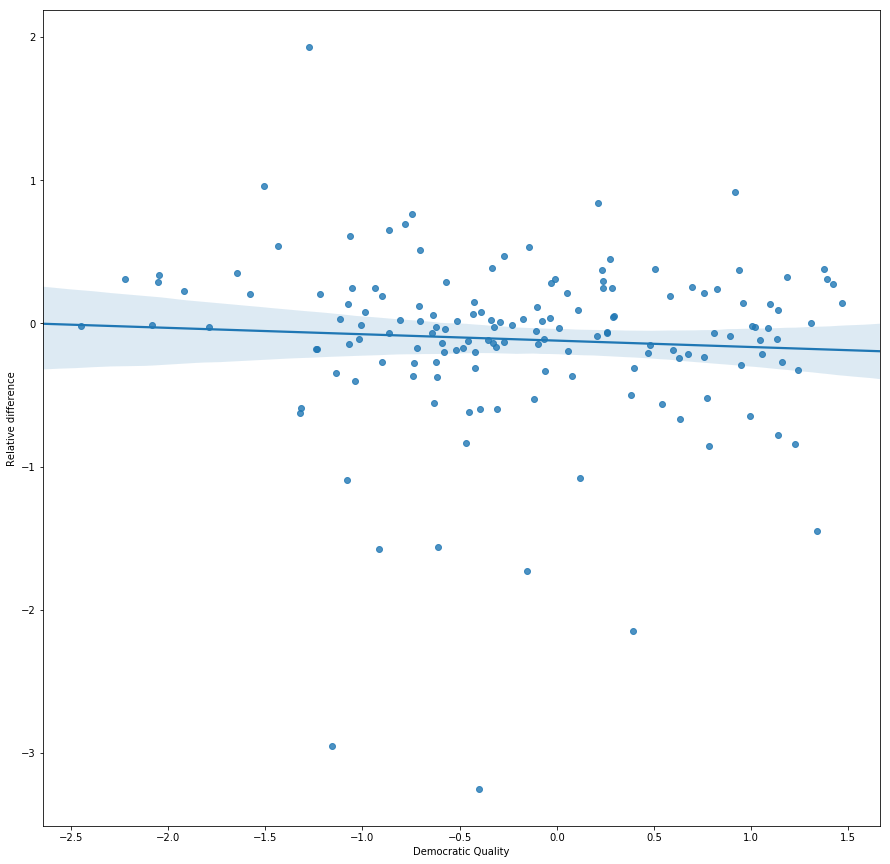

In [408]:
sns.regplot('Democratic Quality', 'Relative difference', ProtestNumber_Difference_DemocraticQuality)

In [304]:
HappinnessData2018 = pd.read_excel('../Data/HappinessData.xls', sheet_name = 'Figure2.2', usecols="A,B")\
    .rename(index=str, columns={'Happiness score':'Happiness_2018'})\
    .rename(index=str, columns={'Country':'country'})\
    .merge(FIPS_codes, left_on='country', right_on='country')

HappinnessData2018['Rank_2018']=HappinnessData2018.index + 1

HappinnessData2018.head()

,country,Happiness_2018,FIPS,Rank_2018
0,Finland,7.6321,FI,1
1,Norway,7.5937,NO,2
2,Denmark,7.5553,DA,3
3,Iceland,7.4952,IC,4
4,Switzerland,7.4873,SZ,5


In [305]:
HappinnessData2015 = pd.read_excel('../Data/HappinessData_2015.xlsx', sheet_name = 'Data for Figure2.2', usecols="B,D", skiprows=3)\
    .rename(index=str, columns={'Ladder score':'Happiness_2015'})\
    .merge(FIPS_codes, left_on='country', right_on='country')

HappinnessData2015['Rank_2015']=HappinnessData2015.index + 1

HappinnessData2015.head()

,country,Happiness_2015,FIPS,Rank_2015
0,Switzerland,7.587,SZ,1
1,Iceland,7.561,IC,2
2,Denmark,7.527,DA,3
3,Norway,7.522,NO,4
4,Canada,7.427,CA,5


In [318]:
HappinessData = HappinnessData2018.merge(HappinnessData2015, left_on=['country','FIPS'], right_on=['country','FIPS'])
HappinessData.head()

,country,Happiness_2018,FIPS,Rank_2018,Happiness_2015,Rank_2015
0,Finland,7.6321,FI,1,7.406,6
1,Norway,7.5937,NO,2,7.522,4
2,Denmark,7.5553,DA,3,7.527,3
3,Iceland,7.4952,IC,4,7.561,2
4,Switzerland,7.4873,SZ,5,7.587,1


In [319]:
HappinessData['HappinessRank_increase']=HappinessData['Rank_2018']>HappinessData['Happiness_2015']
HappinessData['HappinessRank_increase'] = HappinessData['HappinessRank_increase'].astype(int)
HappinessData.head()

,country,Happiness_2018,FIPS,Rank_2018,Happiness_2015,Rank_2015,HappinessRank_increase
0,Finland,7.6321,FI,1,7.406,6,0
1,Norway,7.5937,NO,2,7.522,4,0
2,Denmark,7.5553,DA,3,7.527,3,0
3,Iceland,7.4952,IC,4,7.561,2,0
4,Switzerland,7.4873,SZ,5,7.587,1,0


In [324]:
HappinessData.loc[HappinessData['country']=='United States', 'country'] = 'United States of America'
HappinessData.loc[HappinessData['country']=='Serbia', 'country'] = 'Republic of Serbia'
HappinessRankIncrease_dict = HappinessData.set_index('country')['HappinessRank_increase'].to_dict()

In [399]:
GoldsteinScaleData_2018 = GoldsteinScaleData_2018.rename(index=str, columns={'GoldsteinScale':'GoldsteinScale_2018'})\
    .drop('Country', axis=1)
GoldsteinScaleData_2015 = GoldsteinScaleData_2015.rename(index=str, columns={'GoldsteinScale':'GoldsteinScale_2015'})\
   .drop('Country', axis=1)
GoldsteinScaleEvolution = GoldsteinScaleData_2018.merge(GoldsteinScaleData_2015, left_on=['country','FIPS'], right_on=['country','FIPS'])
GoldsteinScaleEvolution.head()

,FIPS,country,GoldsteinScale_2018,GoldsteinScale_2015
0,AN,Andorra,1.426860,1.523674
1,AE,United Arab Emirates,1.748178,1.680261
2,AF,Afghanistan,-1.052308,-0.758252
3,AC,Antigua and Barbuda,1.535884,1.488308
4,AV,Anguilla,2.049126,1.897081


In [400]:
GoldsteinScaleEvolution['GoldsteinScale_increase'] = GoldsteinScaleEvolution['GoldsteinScale_2018']>GoldsteinScaleEvolution['GoldsteinScale_2015']
GoldsteinScaleEvolution['GoldsteinScale_increase'] = GoldsteinScaleEvolution['GoldsteinScale_increase'].astype(int)
GoldsteinScaleEvolution.head()

,FIPS,country,GoldsteinScale_2018,GoldsteinScale_2015,GoldsteinScale_increase
0,AN,Andorra,1.426860,1.523674,0
1,AE,United Arab Emirates,1.748178,1.680261,1
2,AF,Afghanistan,-1.052308,-0.758252,0
3,AC,Antigua and Barbuda,1.535884,1.488308,1
4,AV,Anguilla,2.049126,1.897081,1


In [401]:
GoldsteinScaleIncrease_dict = GoldsteinScaleEvolution.set_index('country')['GoldsteinScale_increase'].to_dict()

In [402]:
Rank_GoldsteinScale_Map = folium.Map(tiles='Mapbox bright', zoom_start=5.5)


tool=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], sticky=True, \
                           style="font-family: Arial; color: black;", \
                           opacity=0.8, \
                           direction='top')


color_scale = StepColormap(['red','blue'], \
                                     vmin = 0, \
                                     vmax =  1)



folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, HappinessRankIncrease_dict, color_scale),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Happiness rank increase'
    ).add_to(Rank_GoldsteinScale_Map)


folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScaleIncrease_dict, color_scale),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Goldstein scale increase',
    show = False
    ).add_to(Rank_GoldsteinScale_Map)





#color_scale.caption = 'Number of protest event mentions'

Rank_GoldsteinScale_Map.add_child(color_scale)

layerControl = folium.LayerControl()
Rank_GoldsteinScale_Map.add_child(layerControl)

Rank_GoldsteinScale_Map

#ProtestNumber_Map.save('ProtestNumber.html')

#IFrame(src='ProtestNumber.html', width=900, height=700)

In [403]:
WholeData = GoldsteinScaleEvolution.merge(HappinessData, left_on=['country', 'FIPS'], right_on=['country','FIPS'])
WholeData.head()

,FIPS,country,GoldsteinScale_2018,GoldsteinScale_2015,GoldsteinScale_increase,Happiness_2018,Rank_2018,Happiness_2015,Rank_2015,HappinessRank_increase
0,AE,United Arab Emirates,1.748178,1.680261,1,6.7741,20,6.901,20,1
1,AF,Afghanistan,-1.052308,-0.758252,0,3.6315,137,3.575,147,1
2,AL,Albania,1.047697,0.690409,1,4.5860,106,4.959,92,1
3,AM,Armenia,0.873764,0.721289,1,4.3206,122,4.350,122,1
4,AO,Angola,1.654243,1.435550,1,3.7948,134,4.033,132,1


In [341]:
print(WholeData['GoldsteinScale_increase'].corr(WholeData['HappinessRank_increase']))

0.08444759645084639


In [406]:
print(WholeData['GoldsteinScale_2018'].corr(WholeData['Rank_2018']))

-0.21191258285962916


In [ ]:
Paired_data = 